In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import scatterplotmatrix
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.metrics.cluster import completeness_score
import datetime
import math
import plotly.express as px
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv("C:/Users/Victus/Desktop/responses.csv", delimiter=',', low_memory=False)
print(df.info())
df = df.dropna()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
None
      Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
5       5.0                       3.0    2.0   3.0      2.0              3.0   
...     ...                       ...    ...   ...      ...              ...   
1004    5.0                       3.0    4.0   1.0      2.0              3.0   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
10

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 795.1+ KB
None


In [4]:
[*df.head()]

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [5]:
print(df['Age'].values)

[20. 19. 20. 20. 20. 20. 19. 19. 19. 17. 24. 19. 22. 19. 18. 18. 20. 24.
 20. 19. 20. 22. 20. 19. 25. 22. 20. 27. 20. 19. 18. 23. 21. 26. 20. 19.
 20. 25. 20. 20. 19. 21. 18. 21. 23. 21. 22. 23. 23. 23. 18. 17. 20. 24.
 18. 17. 20. 21. 22. 20. 21. 21. 19. 22. 18. 22. 24. 21. 22. 19. 19. 21.
 19. 19. 22. 18. 21. 18. 21. 24. 19. 17. 18. 21. 22. 20. 19. 21. 18. 23.
 16. 23. 21. 23. 20. 20. 20. 19. 15. 20. 18. 15. 20. 16. 18. 21. 19. 19.
 18. 20. 22. 20. 25. 24. 19. 25. 26. 15. 19. 20. 22. 20. 21. 20. 19. 20.
 22. 21. 17. 20. 22. 19. 21. 19. 22. 17. 16. 18. 26. 19. 19. 20. 20. 21.
 19. 24. 19. 25. 20. 19. 21. 20. 20. 18. 17. 19. 18. 18. 30. 24. 20. 20.
 20. 19. 20. 21. 19. 19. 18. 16. 19. 18. 21. 21. 18. 20. 19. 27. 19. 20.
 19. 20. 17. 23. 20. 19. 20. 18. 15. 15. 19. 21. 19. 17. 24. 19. 19. 22.
 20. 19. 19. 18. 19. 20. 20. 20. 27. 19. 20. 20. 21. 16. 18. 23. 19. 19.
 22. 20. 25. 18. 20. 19. 16. 18. 15. 20. 20. 20. 18. 18. 20. 18. 19. 19.
 20. 17. 17. 22. 16. 24. 17. 17. 17. 18. 18. 16. 20

      Age  Height  Music  Slow songs or fast songs  Dance  Country
0    20.0   163.0    5.0                       3.0    2.0      2.0
1    19.0   163.0    4.0                       4.0    2.0      1.0
2    20.0   176.0    5.0                       5.0    2.0      3.0
3    20.0   170.0    5.0                       3.0    4.0      2.0
4    20.0   186.0    5.0                       3.0    2.0      2.0
..    ...     ...    ...                       ...    ...      ...
669  22.0   175.0    5.0                       3.0    4.0      2.0
670  20.0   164.0    5.0                       2.0    5.0      2.0
671  18.0   173.0    4.0                       3.0    1.0      2.0
672  25.0   173.0    5.0                       3.0    3.0      1.0
673  21.0   185.0    5.0                       5.0    4.0      2.0

[674 rows x 6 columns]
                               Age    Height     Music  \
Age                       1.000000  0.128882 -0.074516   
Height                    0.128882  1.000000 -0.067718  

<Axes: >

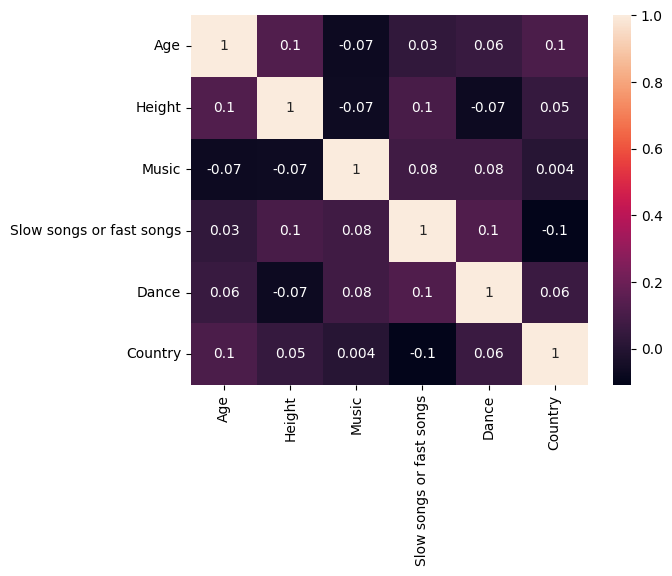

In [6]:
sas1 = [*df['Age'].values]
sas2 = [*df['Height'].values]
sas3 = [*df['Music'].values]
sas4 = [*df['Slow songs or fast songs'].values]
sas5 = [*df['Dance'].values]
sas6 = [*df['Country'].values]

df_new = pd.DataFrame({'Age': sas1, 'Height': sas2, 'Music': sas3, 'Slow songs or fast songs': sas4, 'Dance': sas5, 'Country': sas6})
print(df_new)
print(df_new.corr())
sb.heatmap(df_new.corr(), annot = True, fmt='.1g')

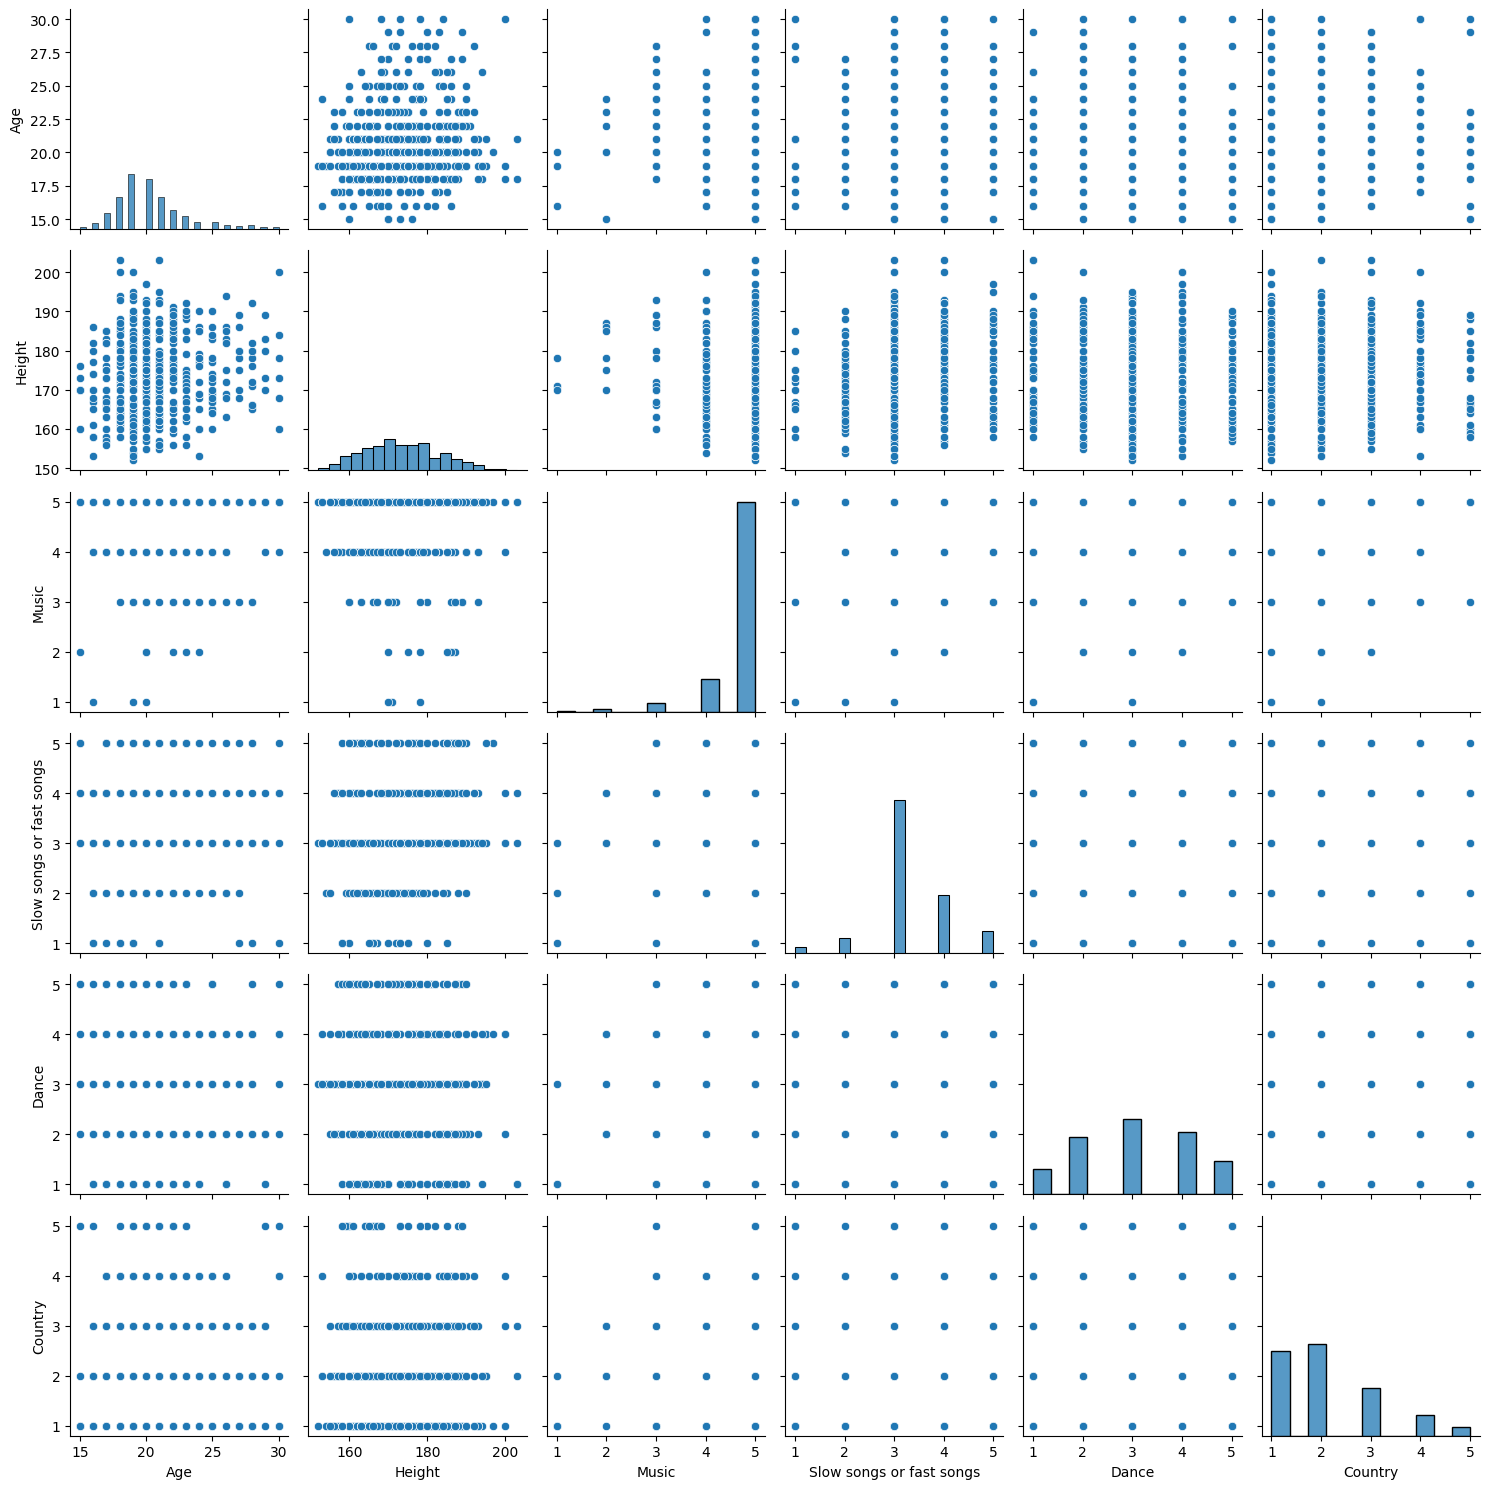

In [7]:
sb.pairplot(df_new) 
plt.tight_layout()

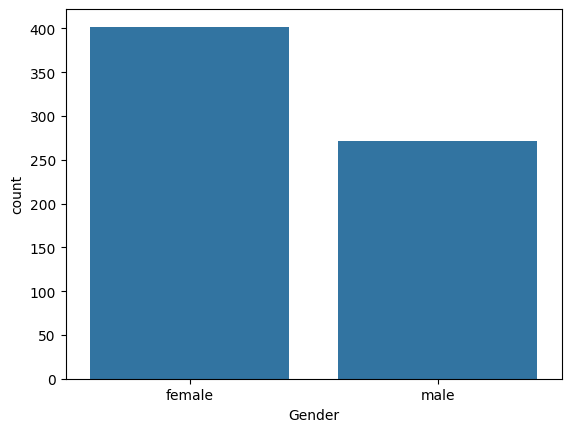

In [8]:
df_newnew = pd.DataFrame({'Gender': df['Gender'].values, 'Count': range(len(df['Gender'].values))})
sb.countplot(x='Gender', data=df_newnew);

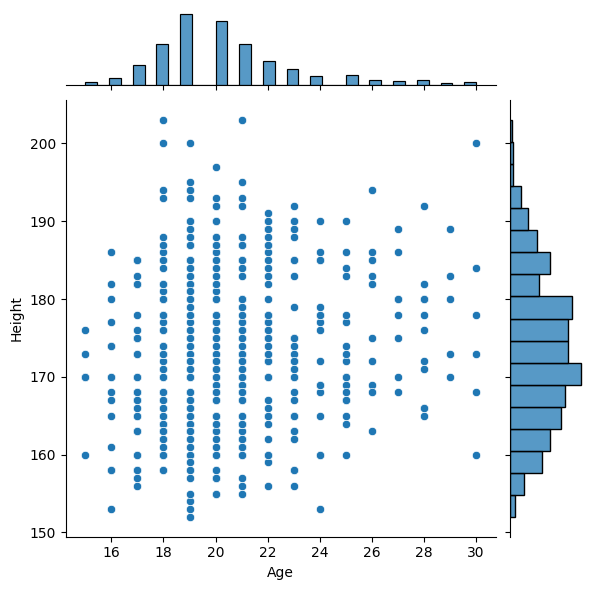

In [9]:
sas1 = [*df['Age'].values]
sas2 = [*df['Height'].values]
df_new = pd.DataFrame({'Age': sas1, 'Height': sas2})
sb.jointplot(x='Age', y='Height', data=df_new, kind='scatter');

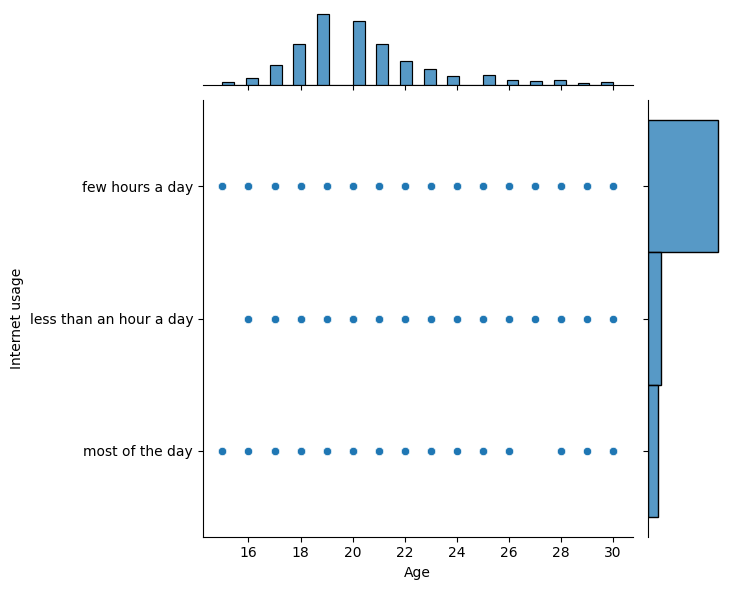

In [10]:
sas1 = [*df['Age'].values]
sas2 = [*df['Internet usage'].values]
df_new = pd.DataFrame({'Age': sas1, 'Internet usage': sas2})
sb.jointplot(x='Age', y='Internet usage', data=df_new, kind='scatter');

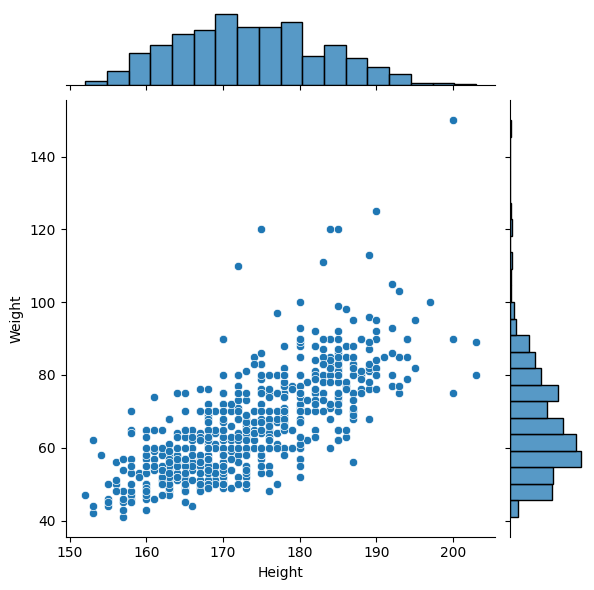

In [11]:
sas1 = [*df['Height'].values]
sas2 = [*df['Weight'].values]
df_new = pd.DataFrame({'Height': sas1, 'Weight': sas2})
sb.jointplot(x='Height', y='Weight', data=df_new, kind='scatter');

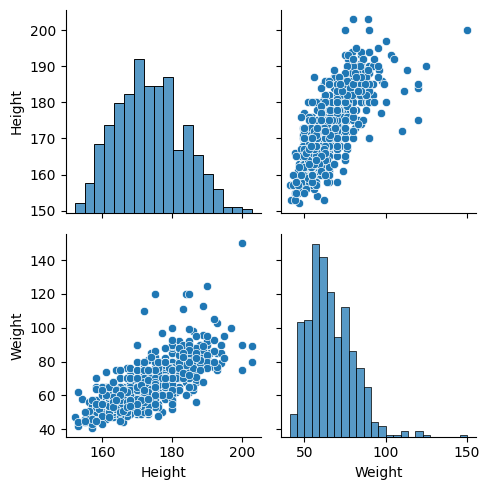

In [12]:
sb.pairplot(df_new) 
plt.tight_layout()

         Height   Weight
Height  1.00000  0.72943
Weight  0.72943  1.00000


<Axes: >

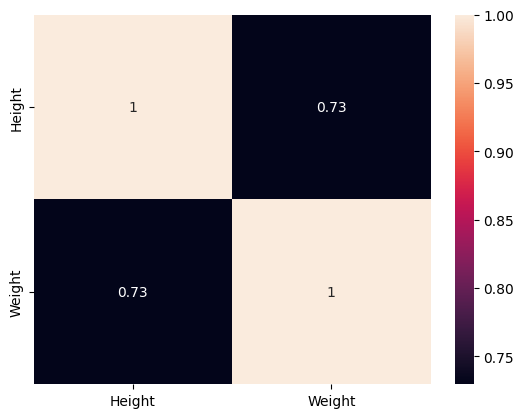

In [13]:
print(df_new.corr())
sb.heatmap(df_new.corr(), annot = True, fmt='.2g')

In [14]:
point_list = []
p = 1
for value in df_new['Height'].values:
    point_list.append([p, df_new['Weight'].values[p-1], df_new['Weight'].values[p-1]])
    p = p + 1

list_of_edges = []


#print(len(point_list))

i = 0
while i < len(point_list):
    x1 = point_list[i][1]
    y1 = point_list[i][2]
    k = 0
    while k < len(point_list):
        if point_list[i][0] != point_list[k][0]:
            x2 = point_list[k][1]
            y2 = point_list[k][2]
            c = ((x1-x2)**2+(y1-y2)**2)**(0.5)
            list_of_edges.append([point_list[i][0], point_list[k][0], c])
        k += 1
    i += 1
print(list_of_edges[1])

[1, 3, 26.870057685088806]


In [15]:
i = 0
find = True
while find == True:
    find = False
    i = 0
    while k < len(list_of_edges) - 1:
        if list_of_edges[i][2] > list_of_edges[i+1][2]:
            help = list_of_edges[i]
            list_of_edges[i] = list_of_edges[i+1]
            list_of_edges[i+1] = help
            find = True
        k += 1

In [16]:
cluster_ar = linkage(df_new, method='ward', metric='euclidean')
link_df = pd.DataFrame(cluster_ar, index=[f' step {i+1}' for i in range(cluster_ar.shape[0])],columns=['cluster', 'cluster 2', 'dist', 'number elements'])
print(link_df.head())
print(link_df)

        cluster  cluster 2  dist  number elements
step 1      0.0       62.0   0.0              2.0
step 2      1.0      316.0   0.0              2.0
step 3      3.0      103.0   0.0              2.0
step 4      4.0       16.0   0.0              2.0
step 5    105.0      270.0   0.0              2.0
          cluster  cluster 2        dist  number elements
step 1        0.0       62.0    0.000000              2.0
step 2        1.0      316.0    0.000000              2.0
step 3        3.0      103.0    0.000000              2.0
step 4        4.0       16.0    0.000000              2.0
step 5      105.0      270.0    0.000000              2.0
...           ...        ...         ...              ...
step 669   1331.0     1339.0   88.621597            237.0
step 670   1337.0     1338.0  118.224961            198.0
step 671   1334.0     1343.0  157.222559            206.0
step 672   1341.0     1342.0  218.636735            468.0
step 673   1344.0     1345.0  474.473010            674.0

[67

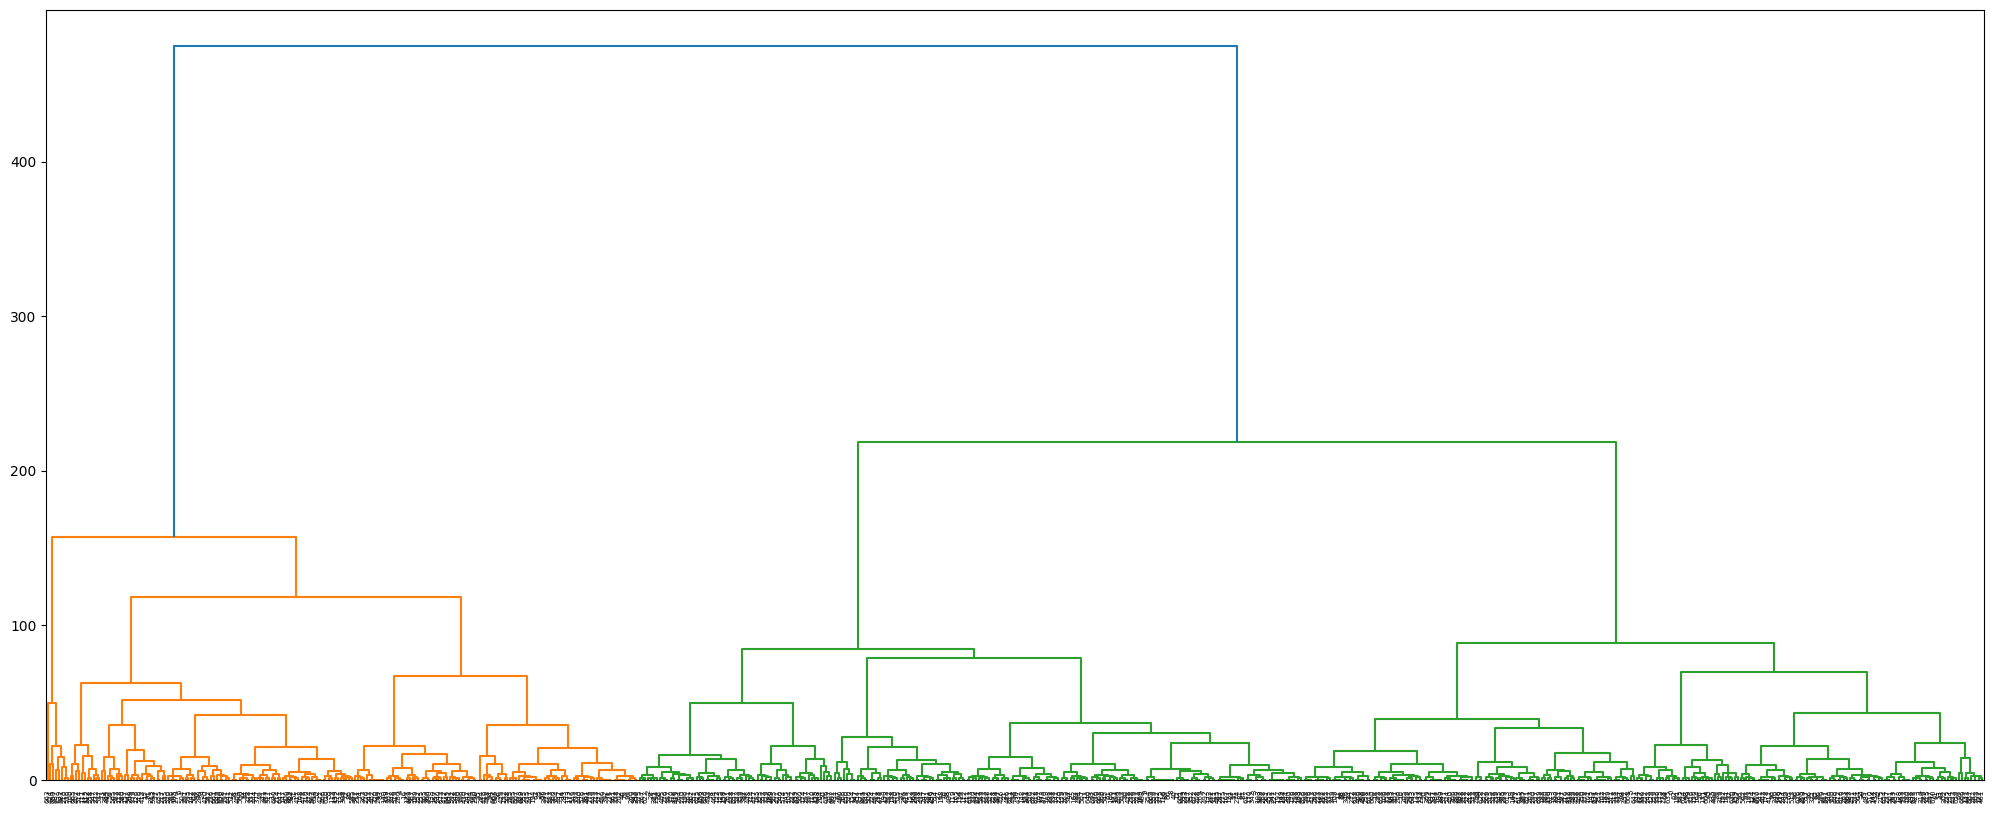

In [17]:
fig = plt.figure(figsize=(25, 10))
row_dendr = dendrogram(link_df)

<Axes: xlabel='Height', ylabel='Weight'>

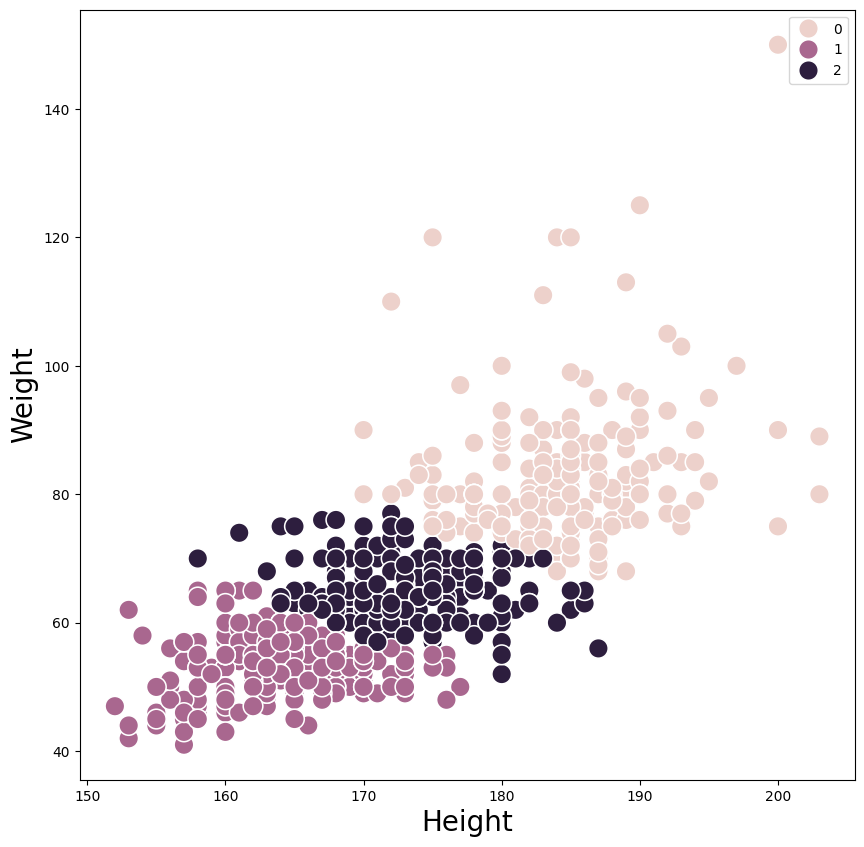

In [18]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
labels = cl.fit_predict(df_new)
plt.figure(figsize=(10,10))
plt.rc('axes', labelsize=20)
sb.color_palette("Paired")
plt.rcParams['scatter.marker'] = 'o'
sb.scatterplot(data=df_new, x='Height', y='Weight', hue=labels, s = 200)

[1 1 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 0 0 0 1 2 0 2 0 1 0 0 0 0 0 1 0 2 2 1
 0 0 1 0 1 1 1 1 1 0 0 1 2 0 2 2 1 1 2 0 0 2 2 0 0 1 0 1 1 0 0 1 1 0 2 2 2
 2 1 0 2 2 0 2 0 0 2 0 1 1 0 0 0 1 2 2 1 0 1 1 0 0 0 2 0 0 0 0 2 0 0 2 0 0
 2 0 2 0 2 0 1 2 0 2 0 1 2 1 2 2 2 1 1 2 1 0 0 2 0 1 1 0 2 2 0 2 0 1 0 1 2
 0 0 0 0 0 0 0 0 2 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 1 0 2 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 2 3 1 0 2 2 1 0 2 0 1 0 0
 1 0 0 2 2 0 1 1 0 0 0 0 0 1 2 1 0 0 2 0 2 1 1 0 0 0 1 2 2 2 2 1 1 2 0 2 0
 0 0 0 0 1 0 0 0 0 0 0 2 0 0 1 0 0 0 1 1 0 2 0 1 2 2 0 0 0 1 1 1 2 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 2 2 0 2 0 0 2 0 1 1 1 0 1 2 1 1 0 1 0 1 0 2 0 1 2 2
 1 0 1 1 0 0 2 1 2 0 0 1 0 1 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 2 0 1 1 2
 0 0 2 0 2 0 0 2 0 2 0 0 0 0 2 1 0 0 1 0 0 2 2 0 0 1 2 0 0 0 1 0 2 0 2 0 2
 1 0 0 2 1 0 2 0 0 0 2 0 1 0 0 2 0 3 1 1 0 0 0 2 0 1 1 0 0 0 0 0 0 0 2 0 1
 2 2 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 2 1 2 0 1 1 0 0 0 1 2 0 0 0 0 0 2 0 0
 1 0 1 0 0 1 3 0 0 2 0 0 

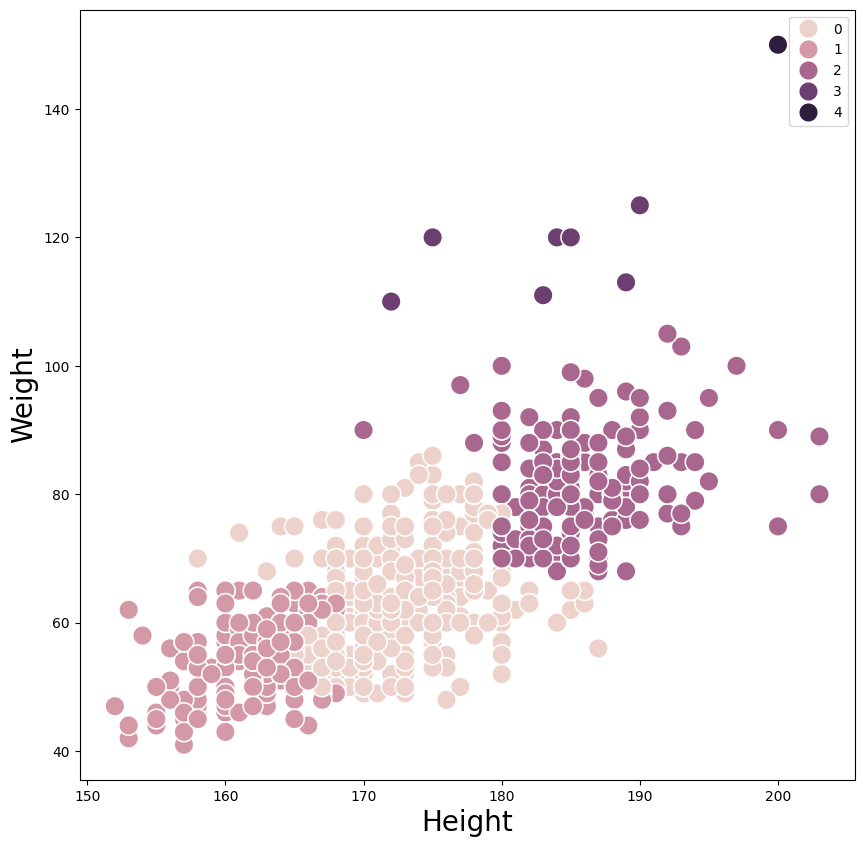

In [19]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(n_clusters=5, linkage = 'complete')
labels = cl.fit_predict(df_new)
plt.figure(figsize=(10,10))
plt.rc('axes', labelsize=20)
sb.color_palette("Paired")
plt.rcParams['scatter.marker'] = 'o'
sb.scatterplot(data=df_new, x='Height', y='Weight', hue=labels, s = 200)
print(labels)

In [29]:
max = [0]
i = 0
for value in df['Weight'].values:
    if value > max[0]:
        max.append(value)
    i += 1
        
sum = 0
i = 0
for value in max:
    sum += value
    i += 1
result = sum/i
print(result)

66.01925925925926


In [32]:
x = 190
y = 90

sas1 = [*df['Height'].values]
sas1.append(x)
sas2 = [*df['Weight'].values]
sas2.append(y)
df_new = pd.DataFrame({'Height': sas1, 'Weight': sas2})
cl = AgglomerativeClustering(n_clusters=5, linkage = 'complete')
labels = cl.fit_predict(df_new)

print(labels[len(labels)-1])


2
